In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# See all columns of dataframe in the notebook
pd.set_option('display.max_columns', None)

Reading the csv files into dataframes

In [4]:
df_mat = pd.read_csv("data/student/student-mat.csv", sep=",")
df_por = pd.read_csv("data/student/student-por.csv", sep=",")

In [5]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Check if columns of both datasets match

In [7]:
sum(list(df_mat.columns != df_por.columns))

0

Check the shapes of both dataframes, we'll need to merge them

In [8]:
df_mat.shape, df_por.shape

((395, 33), (649, 33))

Check the distribution of results of both schools

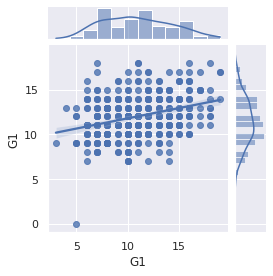

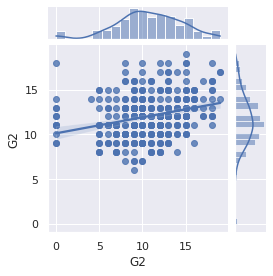

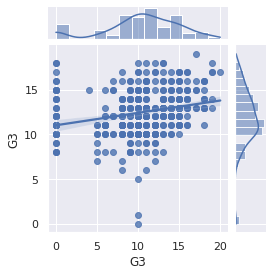

In [9]:
sns.set()
sns.jointplot(x=df_mat.G1, y=df_por.G1, kind='reg', height=4), 
sns.jointplot(x=df_mat.G2, y=df_por.G2, kind='reg', height=4)
sns.jointplot(x=df_mat.G3, y=df_por.G3, kind='reg', height=4)
plt.show()

Since the distributions are almost similar, we can combine the two course dataframes¶

In [10]:
df = pd.concat([df_mat, df_por], ignore_index=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Check for nan values

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

Select all columns

In [12]:
columns_all = df.columns
columns_all

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Check dtype of all columns

In [13]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Select the categorical columns

In [14]:
columns_cat = df.select_dtypes(include=['object']).columns
columns_cat

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Select the numerical columns

In [15]:
columns_num = [col for col in columns_all if col not in columns_cat]
columns_num


['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Check the relationships among numerical columns

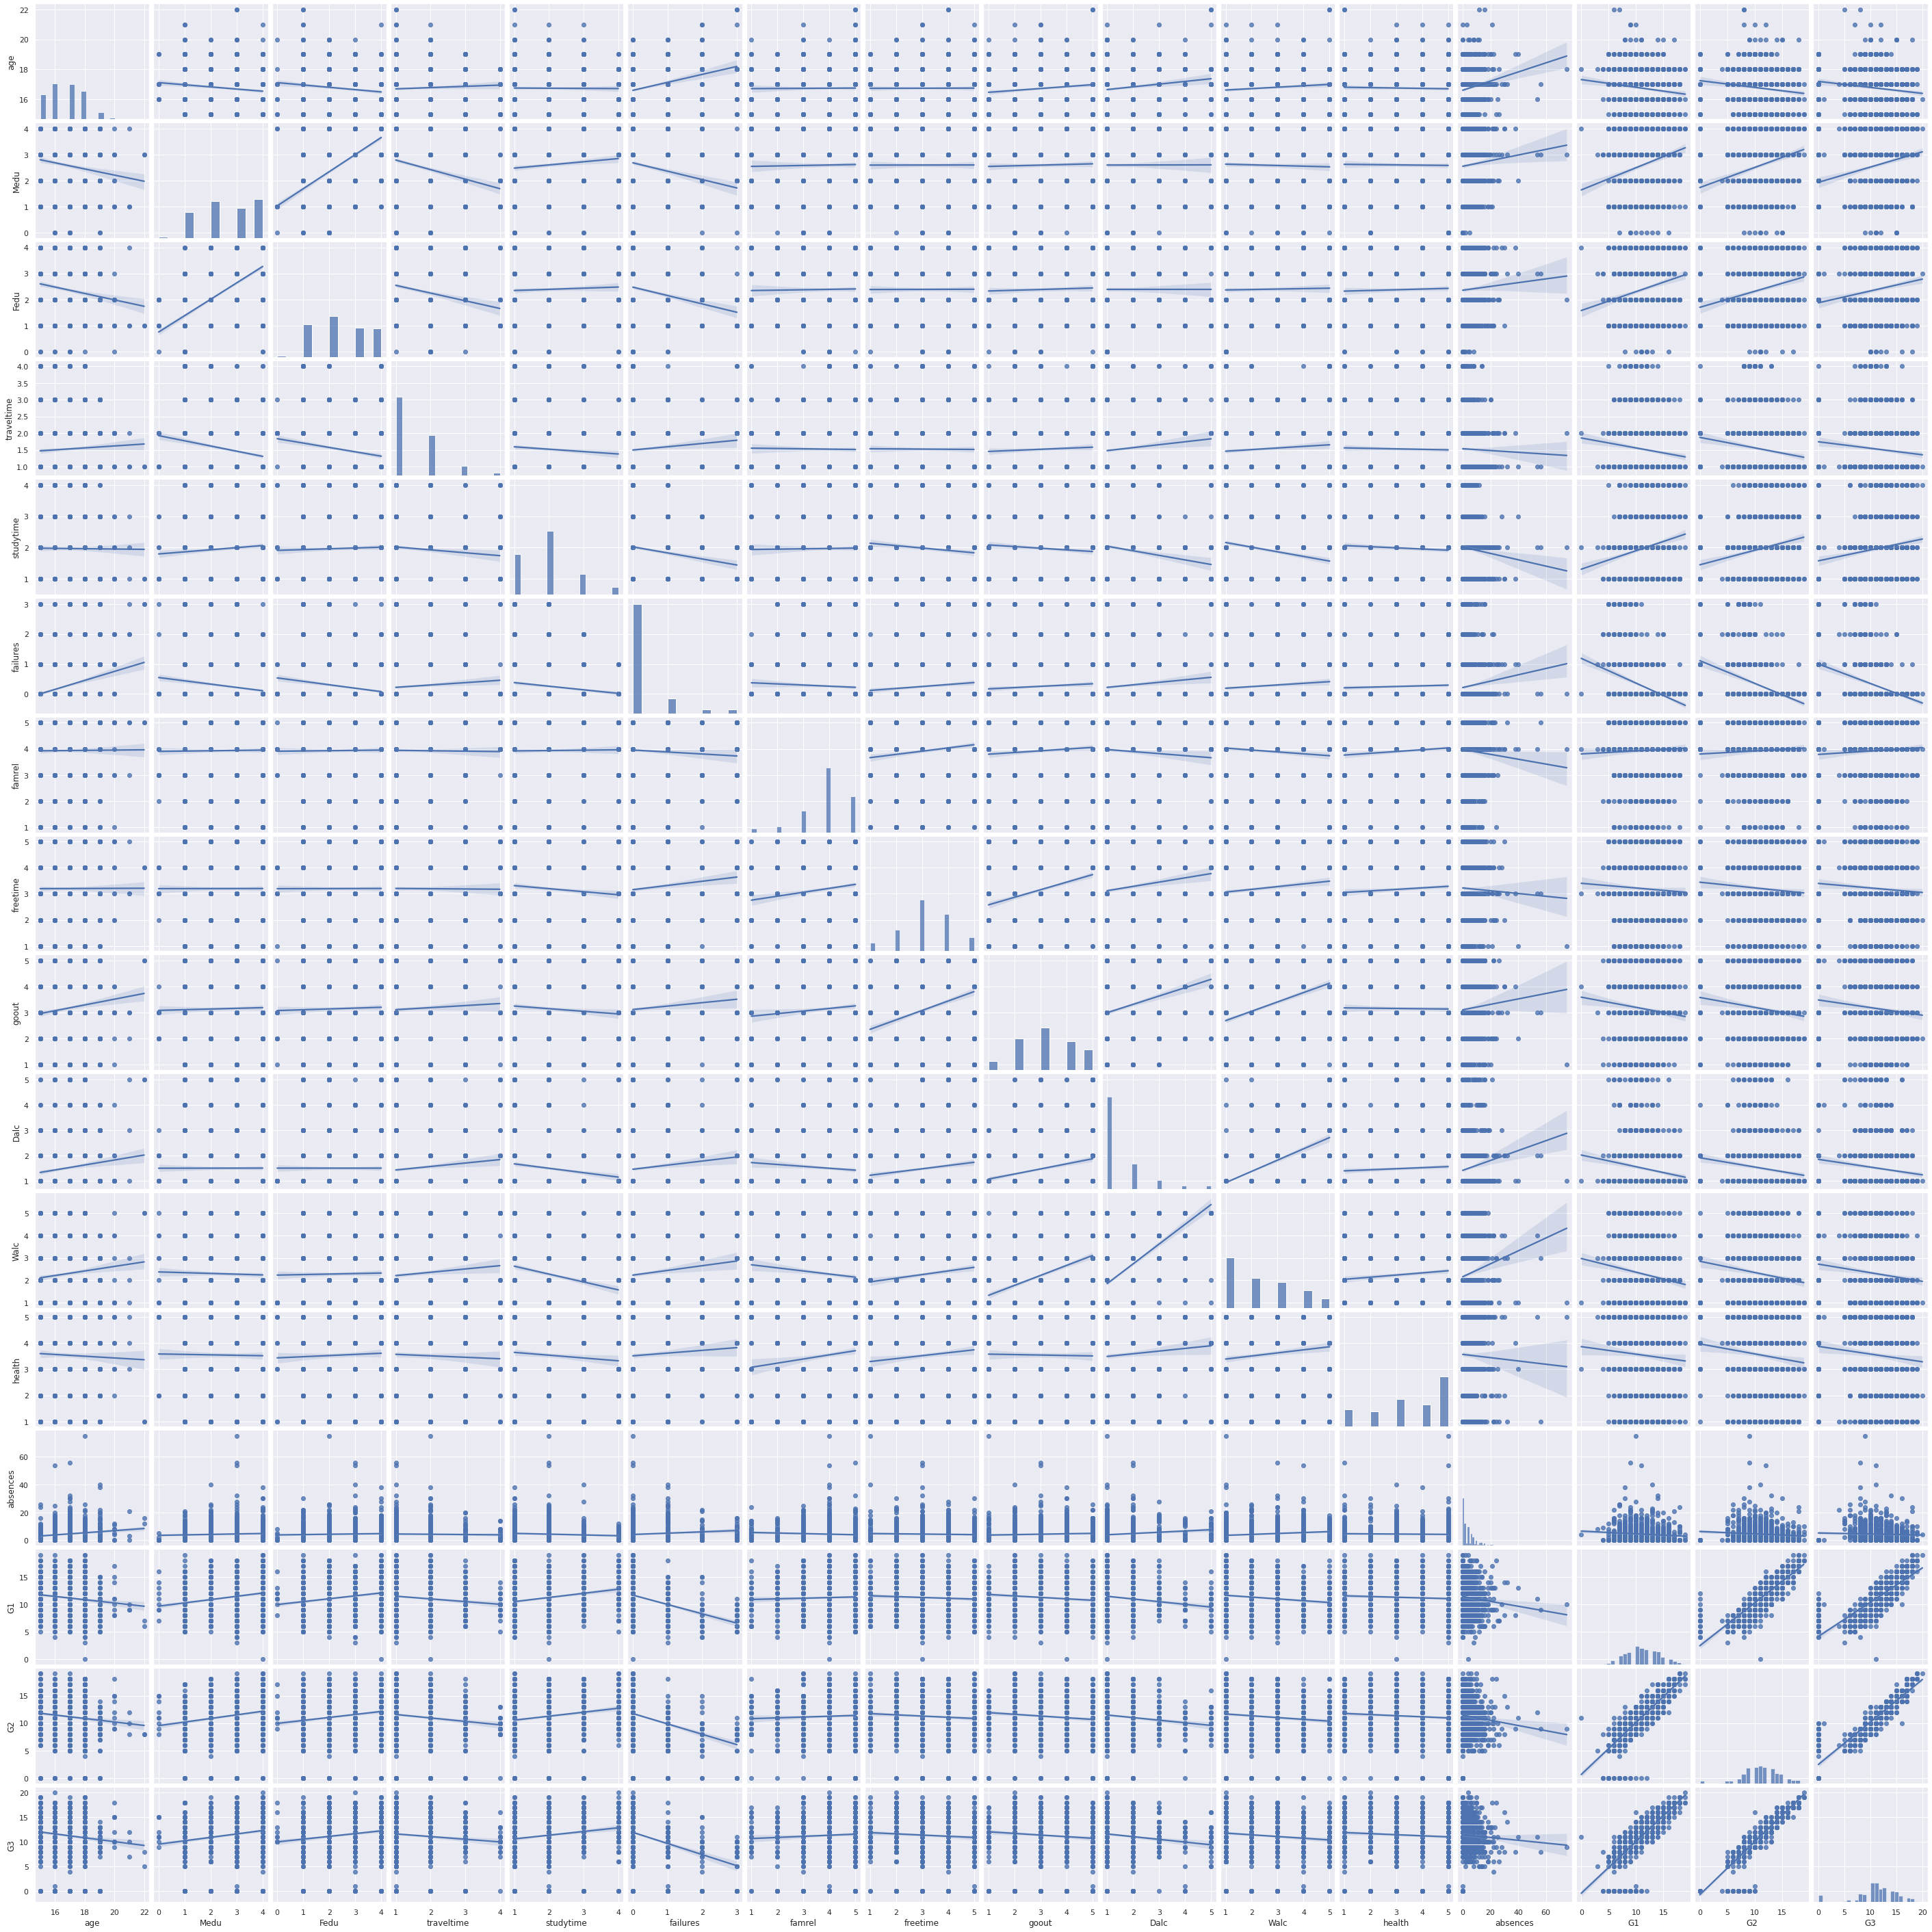

In [16]:
sns.pairplot(df[columns_num], kind='reg')

Encode the categorical columns using dummies

In [18]:
df_encoded = pd.get_dummies(df, columns=columns_cat, drop_first=True)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


Select the features column for the model

In [19]:
X = df_encoded.drop('G3', axis=1)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


Select the target column for the model

In [20]:
y = df_encoded['G3']
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

Split the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Import all needed libraries

In [22]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib.pyplot as plt
%matplotlib inline


Plot the results of a different learning rates for simple sequential model with 1 hidden layer

Epoch 60: early stopping
Epoch 29: early stopping
Epoch 21: early stopping
Epoch 13: early stopping
Epoch 6: early stopping


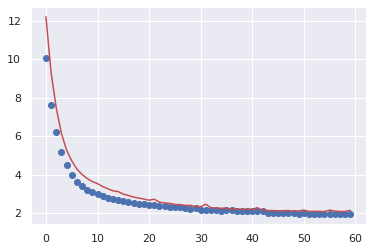

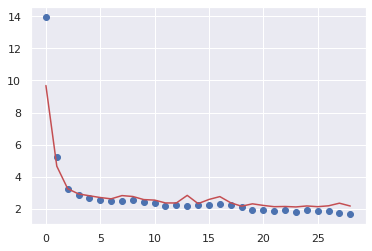

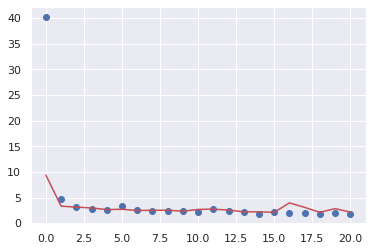

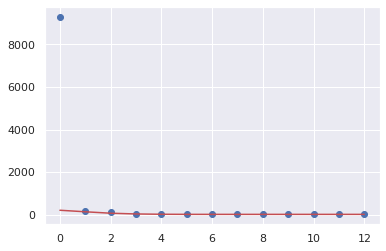

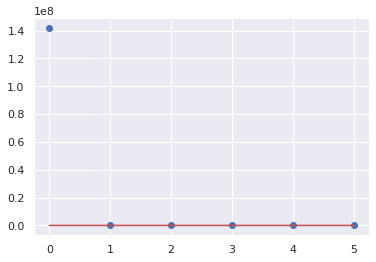

In [23]:
LR = [0.001, 0.01, 0.1, 1, 10]

for i in LR:
    #Define keras sequential model and its structure
    model = Sequential()
    model.add(Dense(16, input_shape=(41,), activation = 'relu'))
    model.add(Dense(1,))
    
    #Compile model
    model.compile(Adam(learning_rate=i), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    # Instantiate 'EarlyStopping' function
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

    # Fits model over 1000 iterations with 'earlystopper' callback, and assign it to history
    history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
    history_dict=history.history
    
    #Plot model's training loss and validation loss to check fitting
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

Now we will use a fine tuned learning rate and a deeper neural network

Epoch 84: early stopping


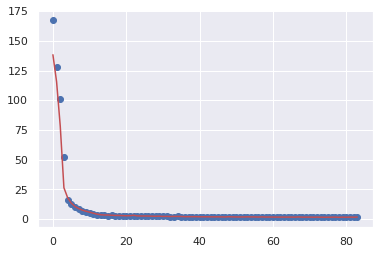

Epoch 29: early stopping


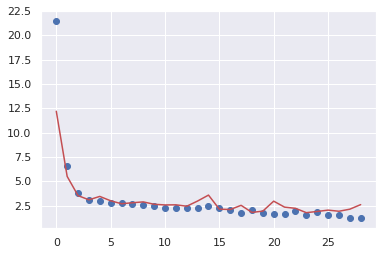

In [24]:
LR = [0.001, 0.01]

for i in LR:
    #Define keras sequential model and its structure
    model = Sequential()
    model.add(Dense(16, input_shape=(41,), activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1,))
    
    #Compile model
    model.compile(Adam(learning_rate=i), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    # Instantiate 'EarlyStopping' function
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

    # Fits model over 1000 iterations with 'earlystopper' callback, and assigns it to history
    history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
    history_dict=history.history
    
    #Plot model's training loss and validation loss to check fitting
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')
    plt.show()


Now we will fix learning rate at 0.001 make predictions and check performance

Epoch 44: early stopping


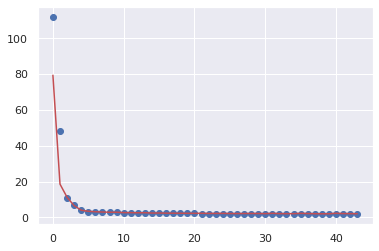

7/7 [==============================] - 0s 2ms/step
R2_Train:	0.89
MAE_Train:	0.88
MSE_Train:	1.67
R2_Test:	0.81
MAE_Test:	1.03
MSE_Test:	3.01


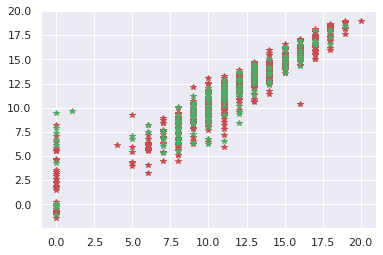

In [25]:
#Define keras sequential model and its structure
model = Sequential()
model.add(Dense(16, input_shape=(41,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,))

#Compile model
model.compile(Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Instantiate 'EarlyStopping' function
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

# Fits model over 1000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, 
                callbacks = [earlystopper])
history_dict=history.history

#Plot model's training loss and validation loss to check fitting
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.show()

# Make predictions with current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and prints performance metrics
print(f"R2_Train:\t{r2(y_train, y_train_pred):0.2f}")
print(f"MAE_Train:\t{mae(y_train, y_train_pred):0.2f}")
print(f"MSE_Train:\t{mse(y_train, y_train_pred):0.2f}")
print(f"R2_Test:\t{r2(y_test, y_test_pred):0.2f}")
print(f"MAE_Test:\t{mae(y_test, y_test_pred):0.2f}")
print(f"MSE_Test:\t{mse(y_test, y_test_pred):0.2f}")

plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.show()
